# Ridge Regression

Ridge regression is implemented in the class [`RidgeReg`](../utils/linear.py). 

## Prediction Function
$$
\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\beta} + \beta_0
$$

Where:
- $ \hat{\mathbf{y}} \in \mathbb{R}^{n \times 1} $ ... vector of predicted values
- $ n $ ... number of samples 
- $ \mathbf{X} \in \mathbb{R}^{n \times d} $ ... feature matrix (samples, features)
- $ d $ ... number of features  
- $ \boldsymbol{\beta} \in \mathbb{R}^{d \times 1} $ ... vector of coefficients (weights)  
- $ \beta_0 \in \mathbb{R} $ ... intercept (scalar)

---

## Loss Function
In matrix notation the squared Euclidean norm is defined as 
$$
||\mathbf{y} - \hat{\mathbf{y}}||_2^2 = (\boldsymbol{\mathbf{y} - \hat{\mathbf{y}}})^\top (\boldsymbol{\mathbf{y} - \hat{\mathbf{y}}})
$$

Therefore, the loss function can be defined as

$$
\mathcal{L}(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \alpha \boldsymbol{\beta}^\top \boldsymbol{\beta}
$$

Where:
- $ \mathbf{y} $ ... true targets
- $ ||\cdot||_2^2 $ ... squared Euclidean (L2) norm  
- $ \alpha $ ... regularization parameter controlling shrinkage
---

## Differentiate the Loss Function

Since the loss function for Ridge regression is strictly convex, we need to compute derivative to find the minimum:
$$
\frac{\partial}{\partial \boldsymbol{\beta}} \mathcal{L} = 0
$$



### The Residual Sum of Squares (RSS)
can be expanded:
$$
\text{RSS} = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) = \mathbf{y}^\top \mathbf{y} - 2\mathbf{y}^\top \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}
$$

Differentiate each term:
- $\frac{\partial}{\partial \boldsymbol{\beta}} \mathbf{y}^\top \mathbf{y} = 0$  
- $\frac{\partial}{\partial \boldsymbol{\beta}} \left(-2 \mathbf{y}^\top \mathbf{X} \boldsymbol{\beta} \right) = -2 \mathbf{X}^\top \mathbf{y}$  
- $\frac{\partial}{\partial \boldsymbol{\beta}} \left( \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} \right) = 2\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}$  

So the gradient of the first term is:

$$
\frac{\partial}{\partial \boldsymbol{\beta}} \text{RSS} = -2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta}
$$




### The Regularization Term


$$
\frac{\partial}{\partial \boldsymbol{\beta}} \alpha \boldsymbol{\beta}^\top \boldsymbol{\beta} = 2\alpha \boldsymbol{\beta}
$$

### Set the combine the Derivatives to Zero
Now combine both parts:

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\beta}} = -2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} + 2\alpha \boldsymbol{\beta} = 0
$$

Simplify and rearranging for $\boldsymbol{\beta}$:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}

$$
---
## Implementation

In Python this can be written as:

```python
beta = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y
```
A more robust version is:
```python
beta = np.linalg.solve(X.T @ X + alpha * np.eye(X.shape[1]), X.T @ y)
```


## Imports & Settings

In [10]:
### Imports
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import sklearn.datasets as skd
import pandas as pd

In [2]:
### Add the utils directory to the path
sys.path.append(os.path.abspath("../utils"))
import linear

In [3]:
### Settings
SEED = 2
np.random.seed(SEED)

# Data
A pre-processed data set on diabetes patients will be used. 

Ref.: [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)


In [4]:
dataset = skd.load_diabetes()

In [5]:
### Features
X = dataset['data']
pd.DataFrame(X, columns=dataset['feature_names'])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
### Targets
y = dataset['target']
pd.Series(y).describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
dtype: float64

In [ ]:
### Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

# Model test

In [ ]:
### Define regularization parameters
alphas = np.logspace(-4, 2, num=10)

### Containers for the errors
train_errors = []
test_errors = []

for alpha in alphas:
    ### Fit the model
    model = linear.RidgeReg(alpha=alpha)
    model.fit(X_train, y_train)
    
    ### Compute the train RMSEs
    y_train_pred = model.predict(X_train)
    train_error = root_mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    ### Compute the test RMSEs
    y_test_pred = model.predict(X_test)
    test_error = root_mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

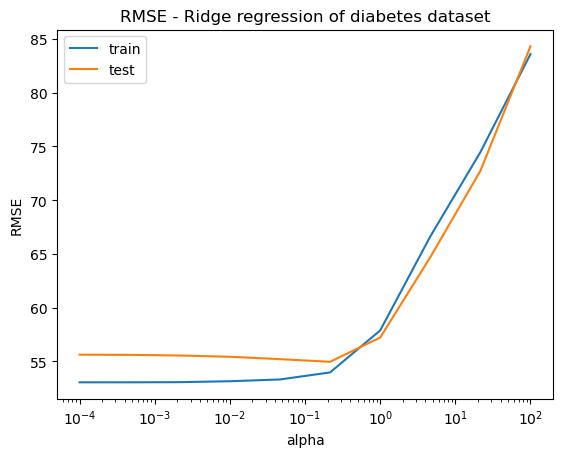

In [9]:
### Plot
plt.plot(alphas, train_errors, label='train')
plt.plot(alphas, test_errors, label='test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE - Ridge regression of diabetes dataset')
plt.show()

The plot shows a certain level of overfitting for $\alpha < 10^{-1}$ and clear underfitting $\alpha < 1$. 